### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge

from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline


The "ISLP Hitters" dataset, often referred to simply as the "Hitters" dataset, is a dataset commonly used in statistics and machine learning for regression analysis. It is part of the "Introduction to Statistical Learning with Applications in R" (ISLR) textbook, hence the abbreviation "ISLR/ISLP."

This dataset contains information about Major League Baseball (MLB) hitters and their salaries. It is used to explore the relationship between various factors and a player's salary, making it suitable for regression analysis.

Here are the features included in the Hitters dataset:

AtBat: Number of times at bat in the previous year.
Hits: Number of hits in the previous year.
HmRun: Number of home runs in the previous year.
Runs: Number of runs in the previous year.
RBI: Number of runs batted in in the previous year.
Walks: Number of walks in the previous year.
Years: Number of years in the major leagues.
CAtBat: Number of times at bat during their career.
CHits: Number of hits during their career.
CHmRun: Number of home runs during their career.
CRuns: Number of runs during their career.
CRBI: Number of runs batted in during their career.
CWalks: Number of walks during their career.
League: A factor with levels A and N indicating the player's league at the end of 1986.
Division: A factor with levels E and W indicating the player's division at the end of 1986.
PutOuts: Number of put outs in the previous year.
Assists: Number of assists in the previous year.
Errors: Number of errors in the previous year.
Salary: Player's salary in thousands of dollars.
This dataset is commonly used for regression tasks to predict a player's salary based on the other features provided. It's a valuable resource for teaching and practicing regression techniques in statistics and machine learning.

### Load and Preprocess the Data

In [2]:
# Loading the dataset
Hitters = pd.read_csv('Hitters.csv')
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
# Converting non-numeric variables to numerical by getting dummy variables
Hitters['League'] = pd.get_dummies(Hitters['League'], drop_first=True)
Hitters['Division'] = pd.get_dummies(Hitters['Division'], drop_first=True)
Hitters['NewLeague'] = pd.get_dummies(Hitters['NewLeague'], drop_first=True)
Hitters.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,0,0,446,33,20,NaN,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1


In [4]:
Hitters.shape

(322, 20)

In [5]:
# Handling missing values by dropping them
Hitters.dropna(axis=0, inplace=True)
Hitters.shape

(263, 20)

In [6]:
# Separating features and target variable
X = Hitters.drop(['Salary'], axis=1)
y = Hitters['Salary']

### Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Set up Cross Validation Strategy

In [8]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

### Ridge Regression

In [9]:
## selecting 20 values of alpha
alphas = np.logspace(-6, 6, 20)


In [31]:
mse_scores_ridge = []
std_errors = []  # To store standard errors for each alpha

for alpha in alphas:
    model = make_pipeline(
        StandardScaler(),
        Ridge(alpha=alpha)
    )
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mse_scores_ridge.append(-1 * np.mean(scores))
    # Standard error calculation for each alpha's MSE across folds
    std_errors.append(np.std(scores) / np.sqrt(len(scores)))

# Use the SE for the alpha that gave the minimum MSE
min_mse = min(mse_scores_ridge)
min_mse_index = mse_scores_ridge.index(min_mse)
min_mse_se = std_errors[min_mse_index]
# print("min_mse_se", min_mse_se)

# Apply the one-standard-error rule
within_one_std = min_mse + min_mse_se

candidate_alphas = [alphas[i] for i, mse in enumerate(mse_scores_ridge) if mse <= within_one_std]

best_alpha_ridge = max(candidate_alphas)

print("candidate_alphas",candidate_alphas)
print(f"Best alpha using the one-standard-error rule: {best_alpha_ridge}")


candidate_alphas [1e-06, 4.281332398719396e-06, 1.8329807108324375e-05, 7.847599703514606e-05, 0.0003359818286283781, 0.0014384498882876629, 0.00615848211066026, 0.026366508987303555, 0.11288378916846883, 0.4832930238571752, 2.06913808111479, 8.858667904100814, 37.92690190732246, 162.37767391887175, 695.1927961775591]
Best alpha using the one-standard-error rule: 695.1927961775591


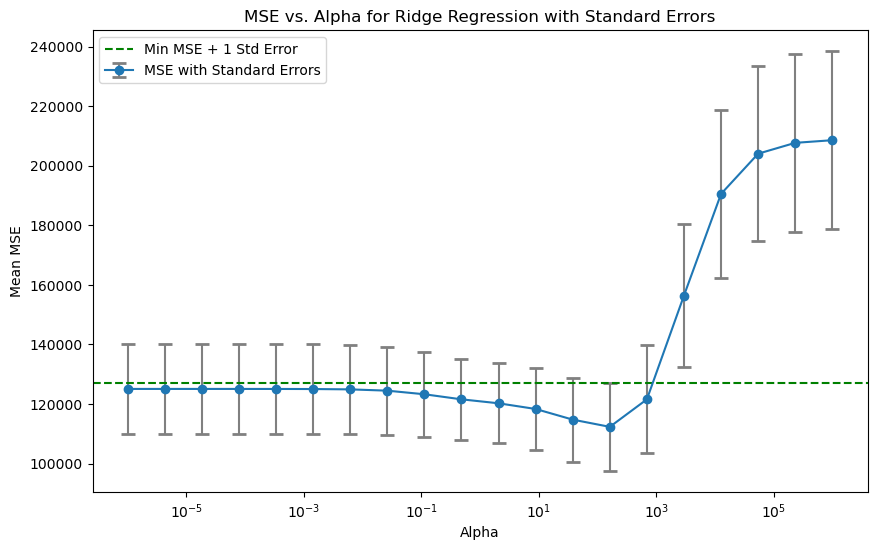

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting MSE vs Alpha with standard error bars
plt.errorbar(alphas, mse_scores_ridge, yerr=std_errors, fmt='-o', ecolor='gray', capsize=5, capthick=2, label='MSE with Standard Errors')

# Highlighting the best alpha according to the one-standard-error rule with a vertical line
# plt.axvline(x=best_alpha_ridge_one_se, color='red', linestyle='--', label=f'Best Alpha: {best_alpha_ridge}')

# Adding a horizontal line for one standard error above the minimum MSE
plt.axhline(y=within_one_std, color='green', linestyle='--', label='Min MSE + 1 Std Error')

plt.xlabel('Alpha')
plt.ylabel('Mean MSE')
plt.xscale('log')  # Alpha values are on a logarithmic scale
plt.title('MSE vs. Alpha for Ridge Regression with Standard Errors')
plt.legend()

plt.show()


### Kernel regression for Gaussian Kernels:

In [32]:
gammas = np.logspace(-3, -1, 20)
alpha_optimal_kernel_ridge = best_alpha_ridge  # Use the best alpha found for Ridge or another value


In [35]:
mse_scores_kernel = []
std_errors_kernel = []

for gamma in gammas:
    model = make_pipeline(
        StandardScaler(),
        KernelRidge(alpha=alpha_optimal_kernel_ridge, kernel='rbf', gamma=gamma)
    )
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mse_scores_kernel.append(-1 * np.mean(scores))
    std_errors_kernel.append(np.std(scores) / np.sqrt(len(scores)))

min_mse_kernel = min(mse_scores_kernel)
min_mse_index_kernel = mse_scores_kernel.index(min_mse_kernel)
min_mse_se_kernel = std_errors_kernel[min_mse_index_kernel]

within_one_std_kernel = min_mse_kernel + min_mse_se_kernel
candidate_gammas = [gammas[i] for i, mse in enumerate(mse_scores_kernel) if mse <= within_one_std_kernel]
best_gamma_kernel = max(candidate_gammas)

print(f"Best gamma using the one-standard-error rule: {best_gamma_kernel}")


Best gamma using the one-standard-error rule: 0.01438449888287663


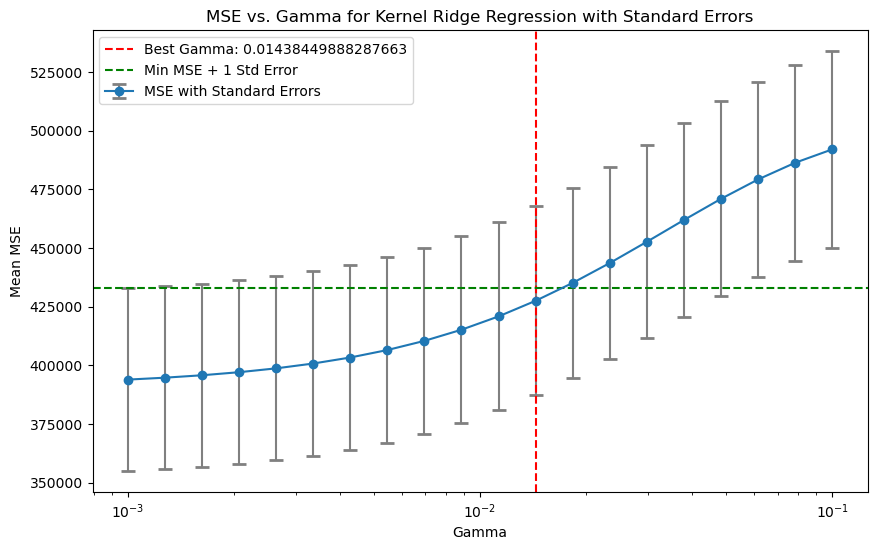

In [36]:
plt.figure(figsize=(10, 6))

# Plotting MSE vs Gamma with standard error bars for Kernel Ridge Regression
plt.errorbar(gammas, mse_scores_kernel, yerr=std_errors_kernel, fmt='-o', ecolor='gray', capsize=5, capthick=2, label='MSE with Standard Errors')

# Highlighting the best gamma according to the one-standard-error rule with a vertical line
plt.axvline(x=best_gamma_kernel_one_se, color='red', linestyle='--', label=f'Best Gamma: {best_gamma_kernel}')

# Adding a horizontal line for one standard error above the minimum MSE for Kernel Ridge
min_mse_plus_se_kernel = min(mse_scores_kernel) + min(std_errors_kernel)  # Adjust as needed based on actual calculations
plt.axhline(y=min_mse_plus_se_kernel, color='green', linestyle='--', label='Min MSE + 1 Std Error')

plt.xlabel('Gamma')
plt.ylabel('Mean MSE')
plt.xscale('log')  # Gamma values are on a logarithmic scale
plt.title('MSE vs. Gamma for Kernel Ridge Regression with Standard Errors')
plt.legend()

plt.show()


In [28]:
## Test MSe

In [37]:
# Ridge model with best alpha
ridge_model = make_pipeline(
    StandardScaler(),
    Ridge(alpha=best_alpha_ridge)
)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Kernel Ridge model with best gamma
kernel_model = make_pipeline(
    StandardScaler(),
    KernelRidge(alpha=alpha_optimal_kernel_ridge, kernel='rbf', gamma=best_gamma_kernel)
)
kernel_model.fit(X_train, y_train)
y_pred_kernel = kernel_model.predict(X_test)
mse_kernel = mean_squared_error(y_test, y_pred_kernel)

print(f"Test MSE for Ridge: {mse_ridge}")
print(f"Test MSE for Kernel Ridge: {mse_kernel}")


Test MSE for Ridge: 145057.36605900232
Test MSE for Kernel Ridge: 361260.25805044884


In [38]:
if mse_ridge < mse_kernel:
    print("Ridge Regression performs better on the test set.")
else:
    print("Kernel Ridge Regression performs better on the test set.")


Ridge Regression performs better on the test set.


### Polynomial regression

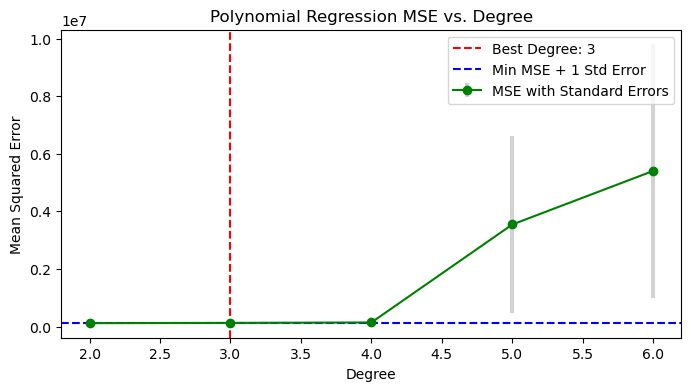

(3, 119037.98941882339, 134044.37130117483)

In [41]:
# Define degrees for polynomial features
degrees = [2, 3, 4, 5, 6]

# Evaluate Polynomial Regression across degrees
mse_scores_poly = []
std_errors_poly = []  # To store standard errors for each degree

for degree in degrees:
    model = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree),
        Ridge(alpha=best_alpha_ridge)  # use the best alpha determined previously
    )
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mse_scores_poly.append(-1 * np.mean(scores))
    # Calculating standard error for each degree's MSE across folds
    std_errors_poly.append(np.std(scores) / np.sqrt(len(scores)))

# Identifying the minimum MSE and its corresponding standard error
min_mse_poly = min(mse_scores_poly)
min_mse_index_poly = mse_scores_poly.index(min_mse_poly)
min_mse_se_poly = std_errors_poly[min_mse_index_poly]

# Applying the one-standard-error rule
within_one_std_poly = min_mse_poly + min_mse_se_poly
candidate_degrees = [degrees[i] for i, mse in enumerate(mse_scores_poly) if mse <= within_one_std_poly]

# The best degree is the maximum of the candidates under the one-standard-error rule
best_degree_poly = max(candidate_degrees)

# Ready to plot
plt.figure(figsize=(8, 4))
plt.errorbar(degrees, mse_scores_poly, yerr=std_errors_poly, label='MSE with Standard Errors', fmt='-o', color='green', ecolor='lightgray', elinewidth=3, capsize=0)
plt.axvline(x=best_degree_poly_one_se, color='red', linestyle='--', label=f'Best Degree: {best_degree_poly}')
plt.axhline(y=within_one_std_poly, color='blue', linestyle='--', label='Min MSE + 1 Std Error')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial Regression MSE vs. Degree')
plt.legend()
plt.show()

(best_degree_poly, min_mse_poly, within_one_std_poly)


In [44]:
# Train Polynomial Regression model with best degree
poly_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(best_degree_poly),
    Ridge(alpha=best_alpha_ridge)
)
poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)


mse_poly = mean_squared_error(y_test, y_pred_poly)

print(f"Test MSE for Ridge Regression: {mse_ridge}")
print(f"Test MSE for Polynomial Regression: {mse_poly}")

# Determine which model performs better
if mse_ridge < mse_poly:
    print("Ridge Regression performs better on the test set.")
else:
    print("Polynomial Regression performs better on the test set.")

Test MSE for Ridge Regression: 145057.36605900232
Test MSE for Polynomial Regression: 184646.67322433
Ridge Regression performs better on the test set.
